In [267]:
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

In [268]:
df = pd.read_csv('dataset/Iris.csv')

In [269]:
df.shape

(150, 6)

In [270]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [271]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [272]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [273]:
from sklearn.preprocessing import OneHotEncoder

In [274]:
ohe = OneHotEncoder(sparse_output= False).set_output(transform='pandas')
ohe_transform = ohe.fit_transform(df[['Species']])
ohe_transform

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [275]:
#df = df.drop(columns=['Species'])
df = pd.concat([df, ohe_transform], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0


In [276]:
import seaborn as sns

<Axes: >

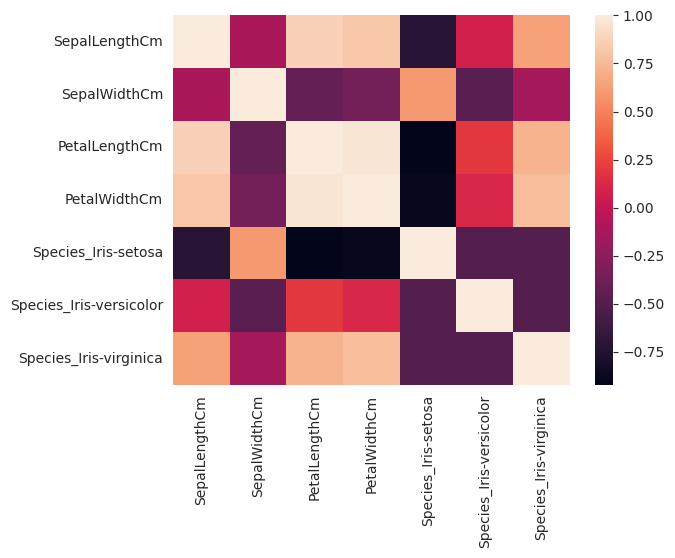

In [277]:
sns.heatmap(df.drop(columns='Species').corr())

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
input_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
#output_cols = ['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']
output_cols = ['Species']
X_train, X_test, Y_train, Y_test = train_test_split(df[input_cols], df[output_cols])

In [280]:
from sklearn.preprocessing import StandardScaler

In [281]:
standard_scaler = StandardScaler()
# The results are similar for both scaled and non scaled
#X_train = standard_scaler.fit_transform(X_train)
#X_test = standard_scaler.transform(X_test)

In [282]:
from sklearn.preprocessing import LabelEncoder

In [283]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)
print(Y_train)
print(Y_test)

[1 0 1 2 0 2 2 1 2 2 1 1 1 0 2 0 0 0 2 2 2 0 0 0 1 0 1 2 1 2 1 0 1 1 0 1 2
 0 0 1 2 0 0 0 0 2 2 2 2 1 0 1 1 2 1 2 0 1 2 2 1 0 2 0 1 1 2 1 0 1 0 0 2 2
 1 0 1 2 0 0 2 0 1 0 2 0 1 0 1 2 2 2 2 2 1 0 0 1 1 1 0 2 1 0 1 2 0 2 2 1 0
 1]
[2 2 0 0 0 0 1 0 2 1 2 2 2 0 1 1 2 1 2 1 0 1 1 2 0 2 1 0 2 2 1 2 0 0 1 0 1
 1]


In [284]:
from sklearn.linear_model import LogisticRegression

In [285]:
lr = LogisticRegression(multi_class='multinomial')
#Y_train = Y_train.idxmax(axis=1)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [286]:
print(Y_pred)

[2 2 0 0 0 0 1 0 2 1 2 2 2 0 1 1 2 1 2 1 0 1 1 2 0 2 1 0 2 2 1 2 0 0 1 0 1
 1]


In [287]:
print(lr.predict_proba(X_train))

[[2.94973600e-03 7.76146718e-01 2.20903546e-01]
 [9.94915578e-01 5.08441187e-03 9.97389478e-09]
 [1.61352026e-01 8.32950659e-01 5.69731539e-03]
 [6.83425063e-06 3.92868709e-02 9.60706295e-01]
 [9.84698057e-01 1.53018799e-02 6.35241806e-08]
 [1.44882919e-05 7.67218006e-02 9.23263711e-01]
 [2.04253296e-05 3.94685767e-02 9.60510998e-01]
 [9.21448561e-04 4.87567663e-01 5.11510889e-01]
 [3.82014963e-05 1.83109803e-01 8.16851996e-01]
 [1.70015066e-03 4.55506995e-01 5.42792855e-01]
 [3.63709681e-02 9.01581036e-01 6.20479959e-02]
 [5.25211732e-02 9.34807935e-01 1.26708914e-02]
 [4.07606272e-03 8.75992749e-01 1.19931188e-01]
 [9.69269000e-01 3.07308374e-02 1.62737185e-07]
 [4.51624635e-04 1.64983295e-01 8.34565081e-01]
 [9.83962162e-01 1.60377666e-02 7.15878007e-08]
 [9.48284926e-01 5.17146900e-02 3.84013421e-07]
 [9.71679774e-01 2.83200157e-02 2.10302550e-07]
 [4.68248331e-04 1.84914389e-01 8.14617363e-01]
 [1.24689348e-05 7.56016821e-02 9.24385849e-01]
 [2.75922572e-05 2.54175941e-02 9.745548

In [288]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [289]:
print(f"Accuracy:            {accuracy_score(Y_test, Y_pred):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print(f"\nPrecision (Micro):   {precision_score(Y_test, Y_pred, average='micro'):.4f}")
print(f"Precision (Macro):   {precision_score(Y_test, Y_pred, average='macro'):.4f}")

print(f"\nRecall (Micro):      {recall_score(Y_test, Y_pred, average='micro'):.4f}")
print(f"Recall (Macro):      {recall_score(Y_test, Y_pred, average='macro'):.4f}")

Accuracy:            1.0000

Confusion Matrix:
[[12  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Precision (Micro):   1.0000
Precision (Macro):   1.0000

Recall (Micro):      1.0000
Recall (Macro):      1.0000


In [290]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [296]:
stratifiedKFold = StratifiedKFold()
model = LogisticRegression()
penalty = [None, 'l2', 'l1', 'elasticnet']
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
C = [1.0, 0.1, 0.01, 0.001]
params = dict(penalty=penalty, solver=solver, C=C)

grid = GridSearchCV(estimator=model, param_grid=params, cv=stratifiedKFold, scoring='accuracy')
grid.fit(X_train, Y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [1.0, 0.1, ...], 'penalty': [None, 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [292]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.9818181818181818


In [297]:
Y_pred = grid.predict(X_test)

In [301]:
print(f"Accuracy:            {accuracy_score(Y_test, Y_pred):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print(f"\nPrecision (Micro):   {precision_score(Y_test, Y_pred, average='micro'):.4f}")
print(f"Precision (Macro):   {precision_score(Y_test, Y_pred, average='macro'):.4f}")

print(f"\nRecall (Micro):      {recall_score(Y_test, Y_pred, average='micro'):.4f}")
print(f"Recall (Macro):      {recall_score(Y_test, Y_pred, average='macro'):.4f}")

Accuracy:            1.0000

Confusion Matrix:
[[12  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Precision (Micro):   1.0000
Precision (Macro):   1.0000

Recall (Micro):      1.0000
Recall (Macro):      1.0000
